In [1]:
import os
import pandas as pd
import datetime as dt

In [2]:
returns = pd.read_csv("data1_returns.csv",index_col=0)

In [3]:
returns.head()

Ambuja Cement Ltd.  Asian Paints  Can Fin Homes Ltd  \
Date                                                              
12/31/2019            0.003067     -0.009627          -0.006948   
1/1/2020              0.003822      0.004622           0.005852   
1/2/2020              0.042386     -0.001422           0.012521   
1/3/2020             -0.009496     -0.021919          -0.012616   
1/6/2020             -0.031957     -0.025266          -0.029981   

            Century Plyboards(India) Ltd.  \
Date                                        
12/31/2019                      -0.008030   
1/1/2020                         0.030511   
1/2/2020                         0.009063   
1/3/2020                         0.002096   
1/6/2020                        -0.011951   

            Crompton Greaves Consumer Electricals Ltd.  \
Date                                                     
12/31/2019                                   -0.007038   
1/1/2020                                      0.011049   
1/2/2020                                     -0.008041   
1/3/2020                                      0.000416   
1/6/2020                                     -0.011220   

            Housing Development Finance Corporation Ltd.  \
Date                                                       
12/31/2019                                     -0.010540   
1/1/2020                                        0.008870   
1/2/2020                                        0.013332   
1/3/2020                                       -0.004845   
1/6/2020                                       -0.028662   

            Heidelbergcement India Ltd  JK Cement Ltd  Kajaria Ceramics Ltd.  \
Date                                                                           
12/31/2019                   -0.002566       0.007195               0.019707   
1/1/2020                      0.000000       0.006545               0.000666   
1/2/2020                      0.041726       0.037144               0.014176   
1/3/2020                      0.007682       0.049049               0.007129   
1/6/2020                     -0.023959      -0.017656              -0.020026   

            Orient Electric Ltd.  Polycab India Ltd  \
Date                                                  
12/31/2019             -0.020318           0.002526   
1/1/2020                0.015155           0.001663   
1/2/2020                0.004715          -0.016953   
1/3/2020               -0.004432           0.005322   
1/6/2020                0.012569          -0.022041   

            Prince Pipes and Fittings Ltd.  Supreme Industries Ltd.  \
Date                                                                  
12/31/2019                       -0.086579                 0.010869   
1/1/2020                          0.022302                -0.011576   
1/2/2020                         -0.000963                 0.002500   
1/3/2020                         -0.024406                 0.007482   
1/6/2020                         -0.011192                -0.012203   

            Unnamed: 14  
Date                     
12/31/2019          NaN  
1/1/2020            NaN  
1/2/2020            NaN  
1/3/2020            NaN  
1/6/2020            NaN

In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 12/31/2019 to 3/30/2021
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Ambuja Cement Ltd.                            312 non-null    float64
 1   Asian Paints                                  312 non-null    float64
 2   Can Fin Homes Ltd                             312 non-null    float64
 3   Century Plyboards(India) Ltd.                 312 non-null    float64
 4   Crompton Greaves Consumer Electricals Ltd.    312 non-null    float64
 5   Housing Development Finance Corporation Ltd.  312 non-null    float64
 6   Heidelbergcement India Ltd                    312 non-null    float64
 7   JK Cement Ltd                                 312 non-null    float64
 8   Kajaria Ceramics Ltd.                         312 non-null    float64
 9   Orient Electric Ltd.                          312 non-n

In [5]:
returns.isnull().sum()

Ambuja Cement Ltd.                                0
Asian Paints                                      0
Can Fin Homes Ltd                                 0
Century Plyboards(India) Ltd.                     0
Crompton Greaves Consumer Electricals Ltd.        0
Housing Development Finance Corporation Ltd.      0
Heidelbergcement India Ltd                        0
JK Cement Ltd                                     0
Kajaria Ceramics Ltd.                             0
Orient Electric Ltd.                              0
Polycab India Ltd                                 0
Prince Pipes and Fittings Ltd.                    0
Supreme Industries Ltd.                           0
Unnamed: 14                                     312
dtype: int64

In [6]:
# returns.drop(columns = [["Unnamed: 14"]])
returns.drop('Unnamed: 14', inplace=True, axis=1)

In [7]:
returns.columns

Index(['Ambuja Cement Ltd.', 'Asian Paints', 'Can Fin Homes Ltd',
       'Century Plyboards(India) Ltd.',
       'Crompton Greaves Consumer Electricals Ltd.',
       'Housing Development Finance Corporation Ltd.',
       'Heidelbergcement India Ltd', 'JK Cement Ltd', 'Kajaria Ceramics Ltd.',
       'Orient Electric Ltd.', 'Polycab India Ltd',
       'Prince Pipes and Fittings Ltd.', 'Supreme Industries Ltd.'],
      dtype='object')

- Now, we’re going to take the finance equivalent of a training set and test set. They typically test their algorithms “in sample” and “out of sample”.

In [8]:
training_period = 70
in_sample = returns.iloc[:(returns.shape[0]-training_period), :].copy()
    

In [9]:
## Save the tickers
tickers = returns.columns.copy()

### The Eigenvalues of the Covariance Matrix
A portfolio using the next eigenvector.

In [10]:
# import numpy as np
    
# covariance_matrix = in_sample.cov().values
# inv_cov_mat = np.linalg.pinv(covariance_matrix) # Use pseudo-inverse incase matrix is singular / ill-conditioned
    
# # Construct minimum variance weights
# ones = np.ones(len(inv_cov_mat))
# inv_dot_ones = np.dot(inv_cov_mat, ones)
# min_var_weights = inv_dot_ones/ np.dot( inv_dot_ones , ones)
    
# min_var_portfolio = pd.DataFrame(data= min_var_weights, columns = ['Investment Weight'], index = tickers)
# min_var_portfolio

In [11]:
# # Largest eigenvalue eigenportfolio
# D, S = np.linalg.eigh(covariance_matrix)


In [12]:
# D

Text(0.5, 1.0, '2nd E.V. Eigenportfolio')

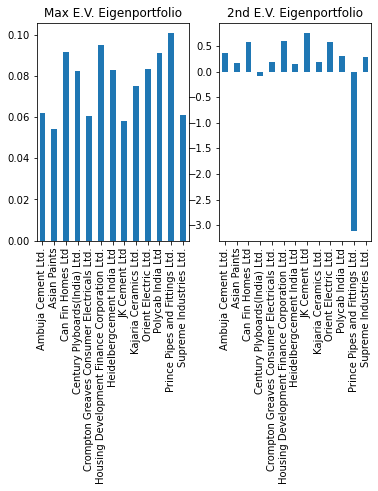

In [13]:
import numpy as np

covariance_matrix = returns.cov()

D, S = np.linalg.eigh(covariance_matrix)

eigenportfolio_1 = S[:,-1] / np.sum(S[:,-1]) # Normalize to sum to 1

eigenportfolio_2 = S[:,-2] / np.sum(S[:,-2]) # Normalize to sum to 1


# Setup Portfolios
eigenportfolio = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = tickers)
eigenportfolio2 = pd.DataFrame(data= eigenportfolio_2, columns = ['Investment Weight'], index = tickers)

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()

ax = plt.subplot(121)
eigenportfolio.plot(kind='bar', ax=ax, legend=False)
plt.title("Max E.V. Eigenportfolio")
ax = plt.subplot(122)
eigenportfolio2.plot(kind='bar', ax=ax, legend=False)
plt.title("2nd E.V. Eigenportfolio")

In [14]:
p1 = S[:,-1] / np.sum(S[:,-1])
p1

array([0.0622197 , 0.05420857, 0.0919404 , 0.08249967, 0.06046817,
       0.09537965, 0.08295196, 0.05836322, 0.07508402, 0.08365139,
       0.0914902 , 0.10076823, 0.06097484])

In [15]:
p2 = S[:,-2] / np.sum(S[:,-2])

In [16]:
mu = returns.mean()

In [17]:
np.dot(mu*252,p2)

-0.8671985150944767

In [18]:
np.dot(mu*252,p1)

0.4970396388869545

In [19]:
eigenportfolio_1

array([0.0622197 , 0.05420857, 0.0919404 , 0.08249967, 0.06046817,
       0.09537965, 0.08295196, 0.05836322, 0.07508402, 0.08365139,
       0.0914902 , 0.10076823, 0.06097484])

In [20]:
S[:,-1]

array([0.21999657, 0.19167079, 0.32508309, 0.29170252, 0.2138035 ,
       0.33724359, 0.29330173, 0.20636081, 0.26548225, 0.29577477,
       0.32349129, 0.35629654, 0.21559497])

In [21]:
ep2 = eigenportfolio2.loc[eigenportfolio2['Investment Weight']>0]
ep3 = ep2/ep2['Investment Weight'].sum()

In [22]:
ep3

Investment Weight
Ambuja Cement Ltd.                                     0.085354
Asian Paints                                           0.041868
Can Fin Homes Ltd                                      0.139596
Crompton Greaves Consumer Electricals Ltd.             0.046098
Housing Development Finance Corporation Ltd.           0.141811
Heidelbergcement India Ltd                             0.036211
JK Cement Ltd                                          0.180214
Kajaria Ceramics Ltd.                                  0.045201
Orient Electric Ltd.                                   0.139265
Polycab India Ltd                                      0.074396
Supreme Industries Ltd.                                0.069987

In [23]:
mu = returns.mean() * 252
mu1 = mu.drop(['Prince Pipes and Fittings Ltd.','Century Plyboards(India) Ltd.'])
mu1

Ambuja Cement Ltd.                              0.415303
Asian Paints                                    0.348833
Can Fin Homes Ltd                               0.452497
Crompton Greaves Consumer Electricals Ltd.      0.449908
Housing Development Finance Corporation Ltd.    0.159837
Heidelbergcement India Ltd                      0.304570
JK Cement Ltd                                   0.822510
Kajaria Ceramics Ltd.                           0.562052
Orient Electric Ltd.                            0.496728
Polycab India Ltd                               0.373305
Supreme Industries Ltd.                         0.541328
dtype: float64

In [27]:
# Return for Eigen Portfolio
np.dot(ep3['Investment Weight'],mu1)*100

47.61223236944802

In [25]:
orignal_weights = pd.read_csv("/Users/pushpamahendra/Praxis Business School-Pushpa’s MacBook Air/Term 3/Capstone/data1_weights.csv",index_col=0)
orignal_weights

Weight%
Companies                                            
Ambuja Cement Ltd.                               6.62
Asian Paints                                    10.19
Can Fin Homes Ltd                                4.99
Century Plyboards(India) Ltd.                    6.08
Crompton Greaves Consumer Electricals Ltd.       8.69
Housing Development Finance Corporation Ltd.     9.03
Heidelbergcement India Ltd                       7.50
JK Cement Ltd                                    7.10
Kajaria Ceramics Ltd.                            8.13
Orient Electric Ltd.                             9.05
Polycab India Ltd                                7.20
Prince Pipes and Fittings Ltd.                   5.49
Supreme Industries Ltd.                          9.87

In [28]:
# return for the Orginal  portfotlio
np.dot(orignal_weights['Weight%'],mu) 

48.00081831717577